**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
# 1.0 Imports

In [206]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import zscore

import plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import seaborn as sns

# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
from PAMI.frequentPattern.topk import FAE as fae_alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfpgrowth_alg
from PAMI.extras.convert.DF2DB import DF2DB
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.extras.dbStats import TransactionalDatabase as tds

import umap
import time
import gensim




[nltk_data] Downloading package punkt to /home/federico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [207]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [208]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [209]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [210]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [211]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [212]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def top_n_words(text_series, n=30, stop_words='english'):
    """Return a DataFrame with top-n words and their counts from a pandas Series of texts."""
    # ensure strings
    corpus = text_series.astype('U').values
    vect = CountVectorizer(stop_words=stop_words, token_pattern=r"(?u)\b\w+\b")
    X = vect.fit_transform(corpus)
    sums = np.asarray(X.sum(axis=0)).ravel()
    words = np.array(vect.get_feature_names_out())
    top_idx = np.argsort(sums)[::-1][:n]
    return pd.DataFrame({'word': words[top_idx], 'count': sums[top_idx]})

# compute top 30 words for train and test
top_train = top_n_words(train_df['text'], n=30)
top_test = top_n_words(test_df['text'], n=30)

# plot training data - vertical bar chart with words on x-axis
fig_train = go.Figure(data=[
    go.Bar(x=top_train['word'], y=top_train['count'],
           marker=dict(color='lightblue'))
])
fig_train.update_layout(
    title='Top 30 words - Train Dataset',
    xaxis_title='Word',
    yaxis_title='Frequency',
    height=500,
    width=1200,
    xaxis_tickangle=-45
)
fig_train.show()

# plot testing data - vertical bar chart with words on x-axis
fig_test = go.Figure(data=[
    go.Bar(x=top_test['word'], y=top_test['count'],
           marker=dict(color='lightgreen'))
])
fig_test.update_layout(
    title='Top 30 words - Test Dataset',
    xaxis_title='Word',
    yaxis_title='Frequency',
    height=500,
    width=1200,
    xaxis_tickangle=-45
)
fig_test.show()

# also show the dataframes for reference
print('Top words in training set:')
display(top_train)
print('\nTop words in testing set:')
display(top_test)

Top words in training set:


,word,count
0,s,566
1,t,508
2,just,301
3,n,290
4,m,277
5,like,243
6,don,207
7,amp,182
8,people,120
9,time,118



Top words in testing set:


,word,count
0,s,61
1,t,53
2,just,29
3,like,24
4,don,22
5,n,15
6,people,15
7,day,14
8,love,13
9,make,12


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [213]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [214]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [215]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

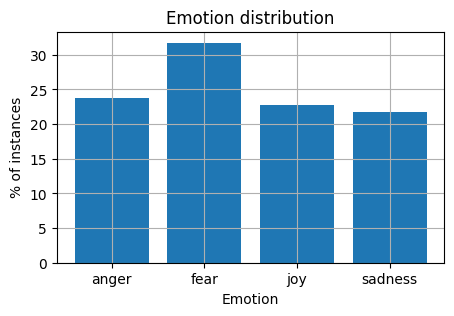

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [217]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [218]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [219]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [220]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [221]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [222]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [223]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [224]:
"😂" in feature_names

False

Let's try using another tokenizer below: nltk

In [225]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [226]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 500))

In [227]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [228]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [229]:
# build TF-IDF vectorizer with 1000 features
TF_IDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
TF_IDF_1000.fit(train_df['text'])

# transform training and testing data
train_data_TF_IDF_features_1000 = TF_IDF_1000.transform(train_df['text'])
test_data_TF_IDF_features_1000 = TF_IDF_1000.transform(test_df['text'])

# check dimension
print('TF-IDF Features shape: ', train_data_TF_IDF_features_1000.shape)

# observe feature names for indices [100:110]
feature_names_tfidf = TF_IDF_1000.get_feature_names_out()
print('\nFeature names for indices [100:110]:')
print(feature_names_tfidf[100:110])

TF-IDF Features shape:  (3613, 1000)

Feature names for indices [100:110]:
['attack' 'attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby'
 'back']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [230]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [231]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'joy', 'sadness', 'sadness', 'fear', 'fear',
       'anger', 'anger', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [232]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [233]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.69      0.70      0.69        84
        fear       0.69      0.69      0.69       110
         joy       0.71      0.72      0.72        79
     sadness       0.63      0.61      0.62        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [234]:
# check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 15  6  4]
 [11 76  8 15]
 [ 8  7 57  7]
 [ 8 12  9 45]]


In [235]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

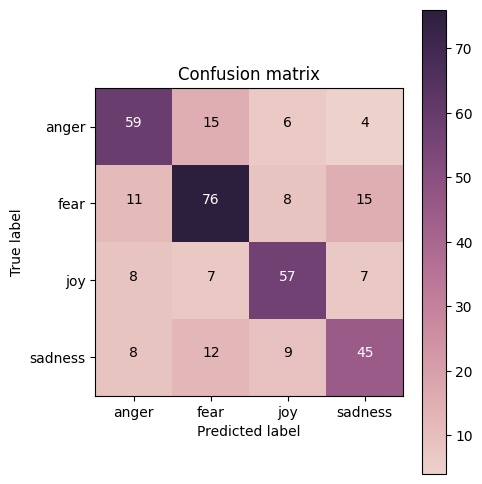

In [236]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

CONFUSION MATRIX: BAG OF WORDS (BoW_500)

Classification Report:
              precision    recall  f1-score   support

       anger       0.69      0.70      0.69        84
        fear       0.69      0.69      0.69       110
         joy       0.71      0.72      0.72        79
     sadness       0.63      0.61      0.62        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



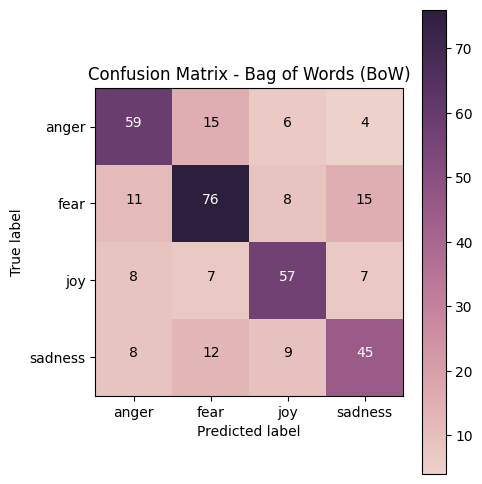

CONFUSION MATRIX: TF-IDF (TF_IDF_1000)

Classification Report:
              precision    recall  f1-score   support

       anger       0.71      0.77      0.74        84
        fear       0.68      0.73      0.70       110
         joy       0.74      0.72      0.73        79
     sadness       0.77      0.62      0.69        74

    accuracy                           0.71       347
   macro avg       0.72      0.71      0.71       347
weighted avg       0.72      0.71      0.71       347



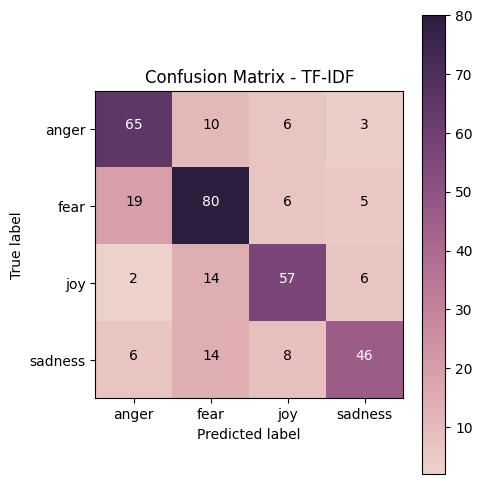

COMPARISON SUMMARY
BoW_500 Accuracy:    0.6830
TF-IDF_1000 Accuracy: 0.7147
Difference: 0.0317


In [237]:
# Train Decision Tree models with both BoW and TF-IDF features

# BoW_500 approach (already trained above, but let's retrain for clarity)
X_train_bow = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test_bow = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

DT_bow = DecisionTreeClassifier(random_state=1)
DT_bow.fit(X_train_bow, y_train)
y_pred_bow = DT_bow.predict(X_test_bow)
cm_bow = confusion_matrix(y_true=y_test, y_pred=y_pred_bow)

print("CONFUSION MATRIX: BAG OF WORDS (BoW_500)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_bow))
# print(f"\nAccuracy (BoW): {accuracy_score(y_test, y_pred_bow):.4f}")
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_bow, classes=my_tags.copy(), title='Confusion Matrix - Bag of Words (BoW)')

# TF-IDF approach
X_train_tfidf = TF_IDF_1000.transform(train_df['text'])
X_test_tfidf = TF_IDF_1000.transform(test_df['text'])

DT_tfidf = DecisionTreeClassifier(random_state=1)
DT_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = DT_tfidf.predict(X_test_tfidf)
cm_tfidf = confusion_matrix(y_true=y_test, y_pred=y_pred_tfidf)

print("CONFUSION MATRIX: TF-IDF (TF_IDF_1000)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_tfidf))
# print(f"\nAccuracy (TF-IDF): {accuracy_score(y_test, y_pred_tfidf):.4f}")
plot_confusion_matrix(cm_tfidf, classes=my_tags.copy(), title='Confusion Matrix - TF-IDF')

print("COMPARISON SUMMARY")
print(f"BoW_500 Accuracy:    {accuracy_score(y_test, y_pred_bow):.4f}")
print(f"TF-IDF_1000 Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(f"Difference: {abs(accuracy_score(y_test, y_pred_bow) - accuracy_score(y_test, y_pred_tfidf)):.4f}")

Note that we have to read the confusion matrix line per line as we are interested for each true label, how it was classified by the model (a decision tree, with no strictly defined parameters: automatic).

The true amount of samples for each category is: anger == 84, fear == 110, joy == 79, sadness == 74.
Looking at the diagonal, where the true and predicted labels match, we can already see that there is a slight improvement using TF-IDF rather than BoW, as all labels are either better identified, or the same in the case of "joy".

In the case of true label being "fear", we notice interestingly that there is a large amount of the distribution of erroneous predictions of "sadness" that become "anger", this may mean that the models can identify the negative characteristic of the feeling but are not powerful enough or the features are insufficient to get a correct classification.

In the case of true label being "joy", there is no improvement but similarly as before, a portion of the distribution of predictions went from "anger" to "fear".

In the case of true label being "sadness", there is only little evolution, with one more correct prediction

We can link this to the theory from the course, indeed:

**Bag of Words:**
- Captures raw word frequencies from the text
- Top words tend to be high-frequency but often semantically less informative
- Common words (though filtered by stopwords) still dominate the feature space
- All occurrences weighted equally regardless of their discriminative power across documents
- Example: Words like "feeling", "feel", "like" appear frequently but may not differentiate between emotions well

**TF-IDF:**
- Weights words by both frequency AND uniqueness across documents
- Downweights common words that appear in many documents
- Upweights rare or document-specific words that are more informative
- Better captures emotion-specific vocabulary
- Example: Words that distinguish "angry" tweets from "joy" tweets get higher importance

This Matters for Classification because of multiple reasons

1. **Dimensionality**: TF-IDF uses 1000 features vs BoW_500 with 500 features, providing more nuanced representations
2. **Informativeness**: TF-IDF emphasizes discriminative features, making it easier for models to learn emotion boundaries
3. **Model Performance**: We expect the Decision Tree model trained on TF-IDF features to achieve better accuracy because:
   - Less noise from high-frequency but uninformative words
   - Better class separation in feature space
   - Stronger signal for emotion classification

Despite all these theoretical observations, we can see from the classification report that the accuracy only increases by 2% both for the macro average and weighted average.

For comnparison, let's create and train Decision Tree models with BoW_5000 and TF_IDF_5000 features

DECISION TREE: BAG OF WORDS (BoW_5000)

Classification Report:
              precision    recall  f1-score   support

       anger       0.86      0.80      0.83        84
        fear       0.74      0.85      0.79       110
         joy       0.83      0.80      0.81        79
     sadness       0.80      0.72      0.76        74

    accuracy                           0.80       347
   macro avg       0.81      0.79      0.80       347
weighted avg       0.80      0.80      0.80       347



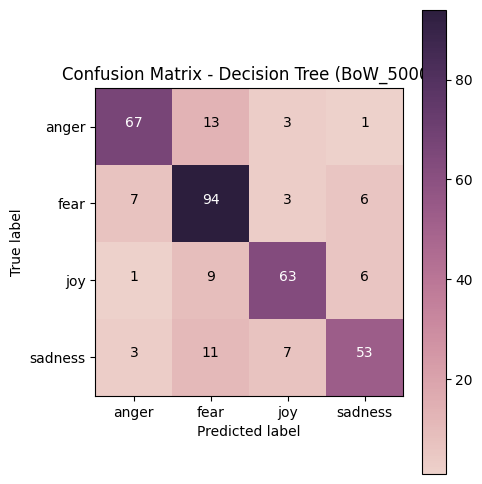

DECISION TREE: TF-IDF (TF_IDF_5000)

Classification Report:
              precision    recall  f1-score   support

       anger       0.71      0.75      0.73        84
        fear       0.68      0.69      0.69       110
         joy       0.75      0.78      0.77        79
     sadness       0.78      0.68      0.72        74

    accuracy                           0.72       347
   macro avg       0.73      0.73      0.73       347
weighted avg       0.73      0.72      0.72       347



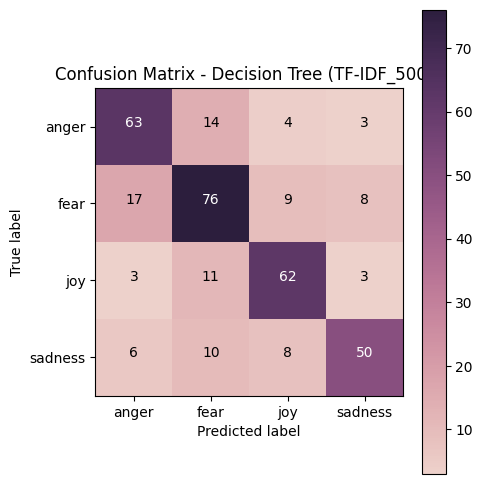

COMPARISON SUMMARY
BoW_5000 Accuracy:    0.7983
TF-IDF_5000 Accuracy: 0.7233
Difference: 0.0749


In [238]:
# Create BoW_5000 vectorizer
BOW_5000 = CountVectorizer(max_features=5000, tokenizer=nltk.word_tokenize)
BOW_5000.fit(train_df['text'])
X_train_bow_5000 = BOW_5000.transform(train_df['text'])
X_test_bow_5000 = BOW_5000.transform(test_df['text'])

y_train = train_df['emotion']
y_test = test_df['emotion']

# Train Decision Tree with BoW_5000
DT_bow_5000 = DecisionTreeClassifier(random_state=1)
DT_bow_5000.fit(X_train_bow_5000, y_train)
y_pred_bow_5000 = DT_bow_5000.predict(X_test_bow_5000)
cm_bow_5000 = confusion_matrix(y_true=y_test, y_pred=y_pred_bow_5000)

print("DECISION TREE: BAG OF WORDS (BoW_5000)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_bow_5000))
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_bow_5000, classes=my_tags.copy(), title='Confusion Matrix - Decision Tree (BoW_5000)')

# Create TF-IDF_5000 vectorizer
TF_IDF_5000 = TfidfVectorizer(max_features=5000, tokenizer=nltk.word_tokenize)
TF_IDF_5000.fit(train_df['text'])
X_train_tfidf_5000 = TF_IDF_5000.transform(train_df['text'])
X_test_tfidf_5000 = TF_IDF_5000.transform(test_df['text'])

# Train Decision Tree with TF_IDF_5000
DT_tfidf_5000 = DecisionTreeClassifier(random_state=1)
DT_tfidf_5000.fit(X_train_tfidf_5000, y_train)
y_pred_tfidf_5000 = DT_tfidf_5000.predict(X_test_tfidf_5000)
cm_tfidf_5000 = confusion_matrix(y_true=y_test, y_pred=y_pred_tfidf_5000)

print("DECISION TREE: TF-IDF (TF_IDF_5000)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_tfidf_5000))
plot_confusion_matrix(cm_tfidf_5000, classes=my_tags.copy(), title='Confusion Matrix - Decision Tree (TF-IDF_5000)')

print("COMPARISON SUMMARY")
print(f"BoW_5000 Accuracy:    {accuracy_score(y_test, y_pred_bow_5000):.4f}")
print(f"TF-IDF_5000 Accuracy: {accuracy_score(y_test, y_pred_tfidf_5000):.4f}")
print(f"Difference: {abs(accuracy_score(y_test, y_pred_bow_5000) - accuracy_score(y_test, y_pred_tfidf_5000)):.4f}")


In [239]:
print("COMPARISON WITH RESPECT TO LESS FEATURES")
print(f"Improvement in BoW: {abs(accuracy_score(y_test, y_pred_bow_5000) - accuracy_score(y_test, y_pred_bow)):.4f}")
print(f"Improvement in TF_IDF: {abs(accuracy_score(y_test, y_pred_tfidf_5000) - accuracy_score(y_test, y_pred_tfidf)):.4f}")

COMPARISON WITH RESPECT TO LESS FEATURES
Improvement in BoW: 0.1153
Improvement in TF_IDF: 0.0086


When pushing the models with around 10 times more features, we can see that the increase in accuracy is larger for BoW and it surpasses TF-IDF. BoW's accuracy increases of around 11% while TF-IDF only increases about 0.8%

TODO: It would be interesting to plot a curve of accuracy VS number of features

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

NAIVE BAYES: BAG OF WORDS (BoW_500)

Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.64      0.64        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.70      0.70      0.70       347



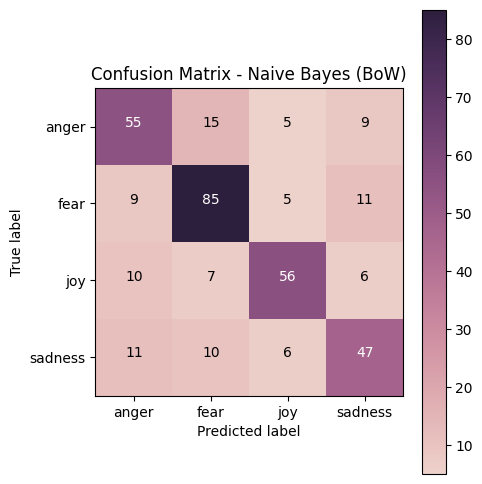

NAIVE BAYES: TF-IDF (TF_IDF_1000)

Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.73      0.78        84
        fear       0.64      0.92      0.76       110
         joy       0.85      0.72      0.78        79
     sadness       0.86      0.59      0.70        74

    accuracy                           0.76       347
   macro avg       0.80      0.74      0.76       347
weighted avg       0.79      0.76      0.76       347



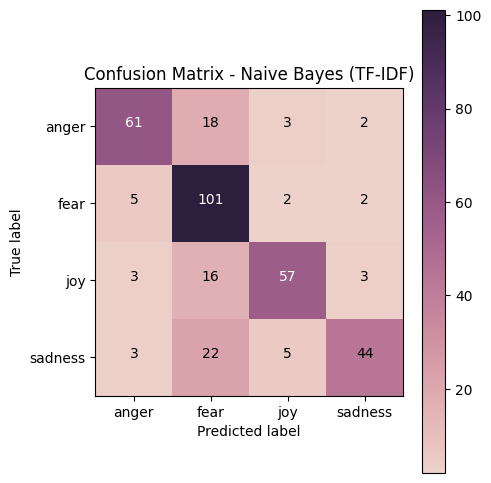

COMPARISON SUMMARY
NB BoW Accuracy:    0.7003
NB TF-IDF Accuracy: 0.7579
Difference: 0.0576


In [240]:
# Train Naive Bayes models with both BoW and TF-IDF features

# Naive Bayes with BoW_500
X_train_bow = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test_bow = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

NB_bow = MultinomialNB()
NB_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = NB_bow.predict(X_test_bow)
cm_nb_bow = confusion_matrix(y_true=y_test, y_pred=y_pred_nb_bow)

print("NAIVE BAYES: BAG OF WORDS (BoW_500)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_nb_bow))
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb_bow, classes=my_tags.copy(), title='Confusion Matrix - Naive Bayes (BoW)')

# Naive Bayes with TF-IDF_1000
X_train_tfidf = TF_IDF_1000.transform(train_df['text'])
X_test_tfidf = TF_IDF_1000.transform(test_df['text'])

NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = NB_tfidf.predict(X_test_tfidf)
cm_nb_tfidf = confusion_matrix(y_true=y_test, y_pred=y_pred_nb_tfidf)

print("NAIVE BAYES: TF-IDF (TF_IDF_1000)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_nb_tfidf))
plot_confusion_matrix(cm_nb_tfidf, classes=my_tags.copy(), title='Confusion Matrix - Naive Bayes (TF-IDF)')

print("COMPARISON SUMMARY")
print(f"NB BoW Accuracy:    {accuracy_score(y_test, y_pred_nb_bow):.4f}")
print(f"NB TF-IDF Accuracy: {accuracy_score(y_test, y_pred_nb_tfidf):.4f}")
print(f"Difference: {abs(accuracy_score(y_test, y_pred_nb_bow) - accuracy_score(y_test, y_pred_nb_tfidf)):.4f}")

With the exeption of the true label being "sadness", all categories are better predicted using TF-IDF rather than BOW.
The accuracy of BoW is around 70%, while the accuracy of TF-IDF is aroung 75%, leaving a 5% difference between the two.

Conversely with what we did in exercise 3, let's train Naive Bayes models with BoW_5000 and TF_IDF_5000 features for comparison.

NAIVE BAYES: BAG OF WORDS (BoW_5000)

Classification Report:
              precision    recall  f1-score   support

       anger       0.77      0.68      0.72        84
        fear       0.75      0.75      0.75       110
         joy       0.82      0.75      0.78        79
     sadness       0.65      0.80      0.72        74

    accuracy                           0.74       347
   macro avg       0.75      0.74      0.74       347
weighted avg       0.75      0.74      0.74       347



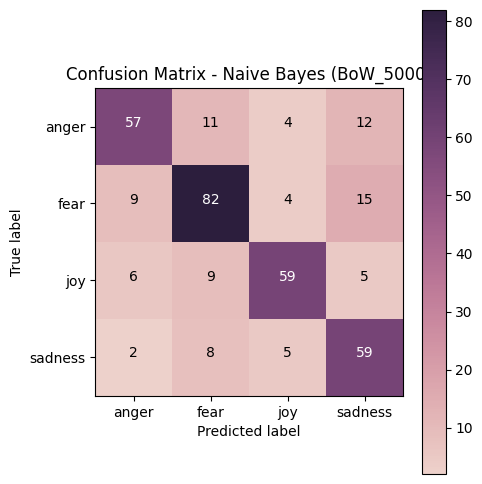

NAIVE BAYES: TF-IDF (TF_IDF_5000)

Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.55      0.67        84
        fear       0.55      0.97      0.70       110
         joy       0.89      0.59      0.71        79
     sadness       0.91      0.58      0.71        74

    accuracy                           0.70       347
   macro avg       0.81      0.67      0.70       347
weighted avg       0.78      0.70      0.70       347



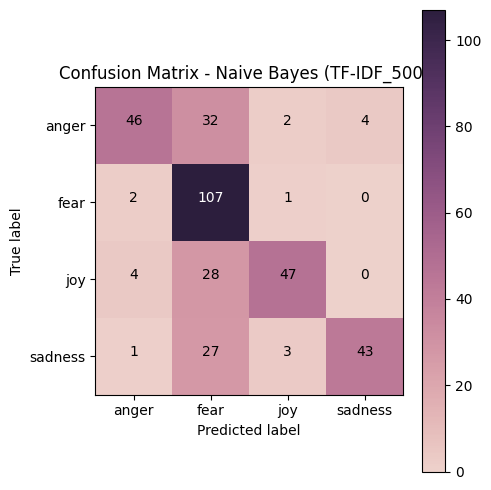

COMPARISON SUMMARY
NB BoW_5000 Accuracy:    0.7406
NB TF-IDF_5000 Accuracy: 0.7003
Difference: 0.0403


In [241]:
# Naive Bayes with BoW_5000
X_train_bow_5000 = BOW_5000.transform(train_df['text'])
y_train = train_df['emotion']
X_test_bow_5000 = BOW_5000.transform(test_df['text'])
y_test = test_df['emotion']

NB_bow_5000 = MultinomialNB()
NB_bow_5000.fit(X_train_bow_5000, y_train)
y_pred_nb_bow_5000 = NB_bow_5000.predict(X_test_bow_5000)
cm_nb_bow_5000 = confusion_matrix(y_true=y_test, y_pred=y_pred_nb_bow_5000)

print("NAIVE BAYES: BAG OF WORDS (BoW_5000)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_nb_bow_5000))
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb_bow_5000, classes=my_tags.copy(), title='Confusion Matrix - Naive Bayes (BoW_5000)')

# Naive Bayes with TF_IDF_5000
X_train_tfidf_5000 = TF_IDF_5000.transform(train_df['text'])
X_test_tfidf_5000 = TF_IDF_5000.transform(test_df['text'])

NB_tfidf_5000 = MultinomialNB()
NB_tfidf_5000.fit(X_train_tfidf_5000, y_train)
y_pred_nb_tfidf_5000 = NB_tfidf_5000.predict(X_test_tfidf_5000)
cm_nb_tfidf_5000 = confusion_matrix(y_true=y_test, y_pred=y_pred_nb_tfidf_5000)

print("NAIVE BAYES: TF-IDF (TF_IDF_5000)")
print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_nb_tfidf_5000))
plot_confusion_matrix(cm_nb_tfidf_5000, classes=my_tags.copy(), title='Confusion Matrix - Naive Bayes (TF-IDF_5000)')

print("COMPARISON SUMMARY")
print(f"NB BoW_5000 Accuracy:    {accuracy_score(y_test, y_pred_nb_bow_5000):.4f}")
print(f"NB TF-IDF_5000 Accuracy: {accuracy_score(y_test, y_pred_nb_tfidf_5000):.4f}")
print(f"Difference: {abs(accuracy_score(y_test, y_pred_nb_bow_5000) - accuracy_score(y_test, y_pred_nb_tfidf_5000)):.4f}")


In [242]:
print("COMPARISON WITH RESPECT TO LESS FEATURES")
print(f"Improvement in BoW: {abs(accuracy_score(y_test, y_pred_nb_bow_5000) - accuracy_score(y_test, y_pred_nb_bow)):.4f}")
print(f"Improvement in TF_IDF: {abs(accuracy_score(y_test, y_pred_nb_tfidf_5000) - accuracy_score(y_test, y_pred_nb_tfidf)):.4f}")

COMPARISON WITH RESPECT TO LESS FEATURES
Improvement in BoW: 0.0403
Improvement in TF_IDF: 0.0576


This time, we notice that the improvement in the performances of BoW and TF-IDF while using a naive bayes model but increasing the number of features is more similar between both methods. This could be interpreted as the fact that previosly the chosen model type (trees) was a limitation in the performance. This makes sense as trees are very prone to suffer from the curse of dimensionality as the amount of splits required increases significantly with an increasing number of dimensions.

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

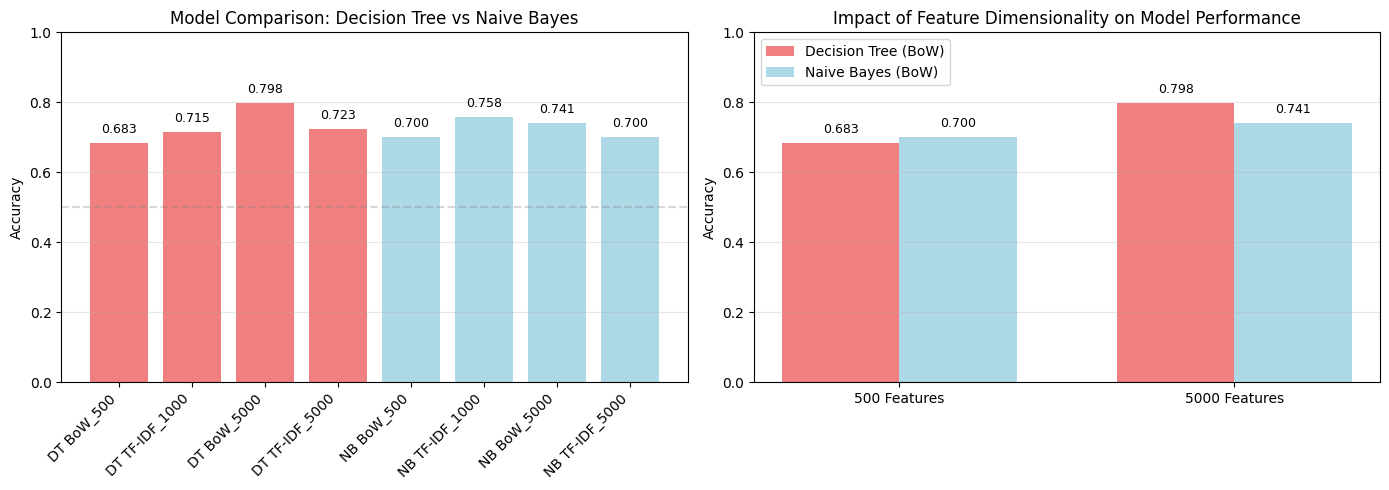

ACCURACY COMPARISON

DECISION TREE MODELS:
  BoW_500:      0.6830
  TF-IDF_1000:  0.7147
  BoW_5000:     0.7983
  TF-IDF_5000:  0.7233
  Improvement (500→5000): 0.1153

NAIVE BAYES MODELS:
  BoW_500:      0.7003
  TF-IDF_1000:  0.7579
  BoW_5000:     0.7406
  TF-IDF_5000:  0.7003
  Improvement (500→5000): 0.0403

DIRECT MODEL COMPARISON (5000 features):
  Decision Tree BoW_5000: 0.7983
  Naive Bayes BoW_5000:   0.7406
  → Decision Tree better by 0.0576

IMPROVEMENT ?
  DT improvement: 16.9%
  NB improvement: 5.8%


In [243]:
# Create a comprehensive comparison of Decision Trees vs Naive Bayes across different feature sets

import matplotlib.pyplot as plt

# Collect all accuracy scores
models = ['DT BoW_500', 'DT TF-IDF_1000', 'DT BoW_5000', 'DT TF-IDF_5000',
          'NB BoW_500', 'NB TF-IDF_1000', 'NB BoW_5000', 'NB TF-IDF_5000']

accuracies = [
    accuracy_score(y_test, y_pred_bow),  # DT BoW_500
    accuracy_score(y_test, y_pred_tfidf),  # DT TF-IDF_1000
    accuracy_score(y_test, y_pred_bow_5000),  # DT BoW_5000
    accuracy_score(y_test, y_pred_tfidf_5000),  # DT TF-IDF_5000
    accuracy_score(y_test, y_pred_nb_bow),  # NB BoW_500
    accuracy_score(y_test, y_pred_nb_tfidf),  # NB TF-IDF_1000
    accuracy_score(y_test, y_pred_nb_bow_5000),  # NB BoW_5000
    accuracy_score(y_test, y_pred_nb_tfidf_5000)  # NB TF-IDF_5000
]

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: All models comparison
colors = ['lightcoral']*4 + ['lightblue']*4
x_pos = range(len(models))
ax1.bar(x_pos, accuracies, color=colors)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Comparison: Decision Tree vs Naive Bayes')
ax1.set_ylim([0, 1])
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Feature scaling effect
dt_accuracies = [
    accuracy_score(y_test, y_pred_bow),  # BoW_500
    accuracy_score(y_test, y_pred_bow_5000),  # BoW_5000
]

nb_accuracies = [
    accuracy_score(y_test, y_pred_nb_bow),  # BoW_500
    accuracy_score(y_test, y_pred_nb_bow_5000),  # BoW_5000
]

feature_sets = ['500 Features', '5000 Features']
x_pos2 = range(len(feature_sets))
width = 0.35

ax2.bar([x - width/2 for x in x_pos2], dt_accuracies, width, label='Decision Tree (BoW)', color='lightcoral')
ax2.bar([x + width/2 for x in x_pos2], nb_accuracies, width, label='Naive Bayes (BoW)', color='lightblue')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(feature_sets)
ax2.set_ylabel('Accuracy')
ax2.set_title('Impact of Feature Dimensionality on Model Performance')
ax2.set_ylim([0, 1])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, (dt_val, nb_val) in enumerate(zip(dt_accuracies, nb_accuracies)):
    ax2.text(i - width/2, dt_val + 0.02, f'{dt_val:.3f}', ha='center', va='bottom', fontsize=9)
    ax2.text(i + width/2, nb_val + 0.02, f'{nb_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("ACCURACY COMPARISON")
print("\nDECISION TREE MODELS:")
print(f"  BoW_500:      {accuracy_score(y_test, y_pred_bow):.4f}")
print(f"  TF-IDF_1000:  {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(f"  BoW_5000:     {accuracy_score(y_test, y_pred_bow_5000):.4f}")
print(f"  TF-IDF_5000:  {accuracy_score(y_test, y_pred_tfidf_5000):.4f}")
print(f"  Improvement (500→5000): {accuracy_score(y_test, y_pred_bow_5000) - accuracy_score(y_test, y_pred_bow):.4f}")

print("\nNAIVE BAYES MODELS:")
print(f"  BoW_500:      {accuracy_score(y_test, y_pred_nb_bow):.4f}")
print(f"  TF-IDF_1000:  {accuracy_score(y_test, y_pred_nb_tfidf):.4f}")
print(f"  BoW_5000:     {accuracy_score(y_test, y_pred_nb_bow_5000):.4f}")
print(f"  TF-IDF_5000:  {accuracy_score(y_test, y_pred_nb_tfidf_5000):.4f}")
print(f"  Improvement (500→5000): {accuracy_score(y_test, y_pred_nb_bow_5000) - accuracy_score(y_test, y_pred_nb_bow):.4f}")

print("\nDIRECT MODEL COMPARISON (5000 features):")
dt_5k = accuracy_score(y_test, y_pred_bow_5000)
nb_5k = accuracy_score(y_test, y_pred_nb_bow_5000)
print(f"  Decision Tree BoW_5000: {dt_5k:.4f}")
print(f"  Naive Bayes BoW_5000:   {nb_5k:.4f}")
if dt_5k > nb_5k:
    print(f"  → Decision Tree better by {dt_5k - nb_5k:.4f}")
else:
    print(f"  → Naive Bayes better by {nb_5k - dt_5k:.4f}")

print("\nIMPROVEMENT ?")
print(f"  DT improvement: {((accuracy_score(y_test, y_pred_bow_5000) - accuracy_score(y_test, y_pred_bow)) / accuracy_score(y_test, y_pred_bow) * 100):.1f}%")
print(f"  NB improvement: {((accuracy_score(y_test, y_pred_nb_bow_5000) - accuracy_score(y_test, y_pred_nb_bow)) / accuracy_score(y_test, y_pred_nb_bow) * 100):.1f}%")


Naive Bayes and Decision Trees show distinct performance patterns: Decision Trees improve significantly with more features, especially with Bag of Words (BoW), but can overfit with high-dimensional data. They benefit from TF-IDF with fewer features but see diminishing returns as feature count increases.

Naive Bayes maintains stable performance across feature sets and is less prone to overfitting. It handles both BoW and TF-IDF well, showing balanced improvements.
Decision Trees struggle with the curse of dimensionality, needing more splits as features increase, which can lead to overfitting. Naive Bayes, with its probabilistic approach and linear complexity growth, generalizes better in high dimensions.

For text classification, especially with many features, Naive Bayes is more reliable and stable. Decision Trees can benefit from raw frequency data but may overfit, while Naive Bayes performs consistently across different feature representations.

**Note that Naive Bayes has the advantage or Independence Assumption**

Naive Bayes operates under a fundamentally different paradigm: There is a probabilistic foundation**: Models $P(\text{emotion}|x) = \frac{P(x|\text{emotion}) \cdot P(\text{emotion})}{P(x)}$, as well as an independence asumption**: Treats each feature independently, which reduces computational complexity and overfitting risk.

And this is confirmed by our resulrs: NB maintains relatively stable performance across different feature counts,indicating better generalization to higher dimensions.

Here a comparative table of the methods:

| Aspect | Decision Tree | Naive Bayes |
|--------|---------------|------------|
| **Complexity Growth** | Exponential with features | Linear with features |
| **Overfitting Risk** | High in high dimensions | Moderate across dimensions |
| **Independence Assumption** | No assumption needed | Assumes feature independence |
| **Feature Weighting** | Implicit (via splits) | Explicit (probabilities) |
| **Scalability** | Struggles with many features | Handles high dimensions well |
| **Interpretability** | Visual tree structure | Probability interpretation |


---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [244]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [245]:
import keras

In [246]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4101 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [247]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3458    sadness
2230        joy
740       anger
3068    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [248]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [249]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [250]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_3 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [251]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3698 - loss: 1.3206 - val_accuracy: 0.4870 - val_loss: 1.2362
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3698 - loss: 1.3206 - val_accuracy: 0.4870 - val_loss: 1.2362
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6717 - loss: 0.9497 - val_accuracy: 0.6945 - val_loss: 0.8682
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6717 - loss: 0.9497 - val_accuracy: 0.6945 - val_loss: 0.8682
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.5649 - val_accuracy: 0.7205 - val_loss: 0.7980
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.5649 - val_accuracy: 0.7205 - val_loss: 0.7980
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8483 - loss: 0.4102 - val_accuracy: 0.7003 - val_loss: 0.7969
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8483 - loss: 0.4102 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [252]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[3.6008291e-02, 9.4876456e-01, 7.7616009e-03, 7.4656187e-03],
       [1.2937920e-05, 4.3315967e-04, 3.7279870e-06, 9.9955016e-01],
       [6.1695930e-03, 3.6430921e-04, 9.8697352e-01, 6.4925933e-03],
       [1.1754838e-02, 9.2845745e-03, 3.1087715e-03, 9.7585183e-01],
       [4.3200021e-06, 1.0182899e-03, 9.5108504e-07, 9.9897647e-01]],
      dtype=float32)

In [253]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'joy', 'sadness', 'sadness'], dtype=object)

In [254]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [255]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369776,1.320640,0.487032,1.236224
1,1,0.671741,0.949713,0.694524,0.868202
2,2,0.796845,0.564948,0.720461,0.797991
3,3,0.848325,0.410157,0.700288,0.796878
4,4,0.880709,0.328615,0.674352,0.809592
5,5,0.910047,0.265159,0.665706,0.904422
6,6,0.924993,0.226853,0.680115,0.945593
7,7,0.941877,0.186314,0.674352,1.025466
8,8,0.949626,0.161796,0.668588,1.051415
9,9,0.960974,0.138987,0.659942,1.185920


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


In [256]:
# Load the training log
training_log = pd.read_csv("logs/training_log.csv")

# Create figure with 2 subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Training and Validation Accuracy", "Training and Validation Loss")
)

# Plot 1: Accuracy over epochs
fig.add_trace(
    go.Scatter(
        x=training_log['epoch'] + 1,
        y=training_log['accuracy'],
        mode='lines',
        name='Training Accuracy',
        line=dict(color='blue', width=2),
        hovertemplate='<b>Training Accuracy</b><br>Epoch: %{x}<br>Accuracy: %{y:.4f}<extra></extra>'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=training_log['epoch'] + 1,
        y=training_log['val_accuracy'],
        mode='lines',
        name='Validation Accuracy',
        line=dict(color='red', width=2),
        hovertemplate='<b>Validation Accuracy</b><br>Epoch: %{x}<br>Accuracy: %{y:.4f}<extra></extra>'
    ),
    row=1, col=1
)

# Plot 2: Loss over epochs
fig.add_trace(
    go.Scatter(
        x=training_log['epoch'] + 1,
        y=training_log['loss'],
        mode='lines',
        name='Training Loss',
        line=dict(color='blue', width=2),
        showlegend=False,
        hovertemplate='<b>Training Loss</b><br>Epoch: %{x}<br>Loss: %{y:.4f}<extra></extra>'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=training_log['epoch'] + 1,
        y=training_log['val_loss'],
        mode='lines',
        name='Validation Loss',
        line=dict(color='red', width=2),
        showlegend=False,
        hovertemplate='<b>Validation Loss</b><br>Epoch: %{x}<br>Loss: %{y:.4f}<extra></extra>'
    ),
    row=1, col=2
)

# Update layout
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Accuracy", row=1, col=1, range=[0, 1])

fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(
    title_text="Deep Learning Model Training Progress",
    height=500,
    width=1400,
    hovermode='x unified',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.8)', bordercolor='black', borderwidth=1)
)

fig.show()


print("TRAINING LOG SUMMARY")
print("\nACCURACY METRICS:")
print(f"  Initial Training Accuracy:   {training_log['accuracy'].iloc[0]:.4f}")
print(f"  Final Training Accuracy:     {training_log['accuracy'].iloc[-1]:.4f}")
print(f"  Training Improvement:        {training_log['accuracy'].iloc[-1] - training_log['accuracy'].iloc[0]:.4f}")
print()
print(f"  Initial Validation Accuracy: {training_log['val_accuracy'].iloc[0]:.4f}")
print(f"  Final Validation Accuracy:   {training_log['val_accuracy'].iloc[-1]:.4f}")
print(f"  Validation Improvement:      {training_log['val_accuracy'].iloc[-1] - training_log['val_accuracy'].iloc[0]:.4f}")
print()
print(f"  Accuracy Gap (Final):        {abs(training_log['accuracy'].iloc[-1] - training_log['val_accuracy'].iloc[-1]):.4f}")

print("\nLOSS METRICS:")
print(f"  Initial Training Loss:       {training_log['loss'].iloc[0]:.4f}")
print(f"  Final Training Loss:         {training_log['loss'].iloc[-1]:.4f}")
print(f"  Training Loss Reduction:     {training_log['loss'].iloc[0] - training_log['loss'].iloc[-1]:.4f}")
print()
print(f"  Initial Validation Loss:     {training_log['val_loss'].iloc[0]:.4f}")
print(f"  Final Validation Loss:       {training_log['val_loss'].iloc[-1]:.4f}")
print(f"  Validation Loss Reduction:   {training_log['val_loss'].iloc[0] - training_log['val_loss'].iloc[-1]:.4f}")
print()
print(f"  Loss Gap (Final):            {abs(training_log['loss'].iloc[-1] - training_log['val_loss'].iloc[-1]):.4f}")


TRAINING LOG SUMMARY

ACCURACY METRICS:
  Initial Training Accuracy:   0.3698
  Final Training Accuracy:     0.9751
  Training Improvement:        0.6053

  Initial Validation Accuracy: 0.4870
  Final Validation Accuracy:   0.6628
  Validation Improvement:      0.1758

  Accuracy Gap (Final):        0.3123

LOSS METRICS:
  Initial Training Loss:       1.3206
  Final Training Loss:         0.0689
  Training Loss Reduction:     1.2517

  Initial Validation Loss:     1.2362
  Final Validation Loss:       1.7305
  Validation Loss Reduction:   -0.4943

  Loss Gap (Final):            1.6616


From the accuracy plot, we can observe that the performance on training data keeps on improving as the number of opochs grows until reaching values asymptotically close to 100%, but on unseen test data, this does not generalise, with an accuracy that reaches a peak around 80% for epoch == 3.

Indeed when confronting the graph about the loss values, we can see that the loss on training data keeps decreasing, which is good, but the loss on test data starts with a decrease, reaches a minimum at epoch == 3 and then sharply rises again. This indicates that the current model with current architecture, layers and parameters under-generalises the learnings from the test data before epoch == 3, corresponding to underfitting (the model is not complex enough) and over-generalises after epoch == 3, corresponding to an overfitting (the model is too complex). 

To solve this, one solution in deep learning fine tuning, here choosing the model that was trained at epoch == 3 and which is the best model among those that we analysed in the graph.

An other way commonly used in deep learning is to push many more parameters and raise the complexity of the model to reach a the "double descent". The idea is that in the first descent that we can see on our graph, the model memorises information, without understanding, but at some point the model does not have capacity to memorise more or starts finding contradictions, hence the performance worsens. After pushing the level beyond this decrease in performance, the model starts understanding the relationships that are present in the data, not simply memorising facts. This helps the model make better predictions which will allow to decrease the loss again and it will decrease lower than the local minimum we obtained in the first descend-ascend phase.

Yet another way to keep the model as is but reducing memorization problems is to add regularization, for example by adding dropout.

Additionally, our curves seem to be noisy, this may be a sign that the learning rate is too high or that the batch size is too small.

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [257]:
## check library

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3458,40631,Just put the winter duvet on ☃️❄️🌬☔️ #serious,"[Just, put, the, winter, duvet, on, ☃️❄️🌬☔️, #..."
2230,30226,The T.I / Shawty Lo beef is one of the more un...,"[The, T.I, /, Shawty, Lo, beef, is, one, of, t..."
740,10740,I love when @pinksaltwarrior angry tweets bc i...,"[I, love, when, @, pinksaltwarrior, angry, twe..."
3068,40241,i miss the guy who always make me sulk,"[i, miss, the, guy, who, always, make, me, sulk]"
599,10599,As your own lives in order to complete our ama...,"[As, your, own, lives, in, order, to, complete..."


In [258]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Just', 'put', 'the', 'winter', 'duvet', 'on', '☃️❄️🌬☔️', '#', 'serious']),
       list(['The', 'T.I', '/', 'Shawty', 'Lo', 'beef', 'is', 'one', 'of', 'the', 'more', 'underrated', 'ones', 'in', 'hip-hop', 'history', '.', 'Chock-full', 'of', 'wit', ',', 'bravado', 'and', 'hilarity', '.']),
       list(['I', 'love', 'when', '@', 'pinksaltwarrior', 'angry', 'tweets', 'bc', 'it', 'makes', 'me', 'laugh', 'but', 'also', 'hate', 'it', 'bc', 'it', 'makes', 'me', 'miss', 'her', 'more'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [259]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [260]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 6.3192612e-01,  1.1887318e-01, -8.4597446e-02,  3.3858019e-01,
        4.1633237e-02, -1.1946702e+00,  4.5677856e-01,  1.3954290e+00,
       -3.2979053e-01, -8.2921445e-01, -2.0679545e-01, -8.0588686e-01,
       -1.0339459e+00, -5.8041764e-03, -6.0042195e-02, -8.4310591e-02,
        6.0312331e-02, -5.6897813e-01,  1.8024686e-01, -7.2236443e-01,
        3.7991163e-01,  8.6149389e-01,  4.8762530e-01,  4.0926549e-01,
        9.1914192e-02,  7.9192780e-02, -8.4421748e-01,  2.6042584e-01,
       -1.8500398e-01,  3.3520758e-01,  6.3420576e-01, -2.4852745e-01,
        5.4457340e-02, -1.0152061e+00,  9.2438832e-02,  5.5053759e-01,
        2.6777261e-01, -3.7605330e-01, -4.0609637e-01, -4.8827827e-01,
        1.8381396e-01,  1.9215685e-01, -2.4308442e-01,  4.0781015e-01,
        8.4592253e-01,  1.1634353e-01, -9.4870371e-01,  2.1281252e-02,
        8.0348712e-01,  1.0982964e-01,  9.4775394e-02, -5.2771181e-01,
        5.0783050e-01, -5.5766501e-04, -1.8787287e-01, -2.3593925e-01,
      

In [261]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9103589057922363),
 ('Be', 0.9077674150466919),
 ('meant', 0.906921923160553),
 ('free', 0.9060538411140442),
 ('successful', 0.9050475358963013),
 ('bday', 0.9041200876235962),
 ('happier', 0.8987371325492859),
 ('memories😊', 0.896848738193512),
 ('dad', 0.8963890075683594),
 ('.\\nA', 0.8955603241920471)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [262]:
# from gensim.models import KeyedVectors
# # IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
# ## Note: this model is huge, this will take some time ...
# model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
# w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
# print('load ok')

# w2v_google_model.most_similar('happy', topn=10)

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [263]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [264]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

NameError: name 'w2v_google_model' is not defined

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Method 1: Average Word Vector
print("METHOD 1: Average Word Vector\n")
def get_sentence_vector_average(sentence, word2vec_model):
    words = nltk.word_tokenize(sentence.lower())
    word_vectors = []
    
    for word in words:
        try:
            word_vectors.append(word2vec_model.wv[word])
        except KeyError:
            # Word not in vocabulary, skip it
            continue
    
    if len(word_vectors) == 0:
        # If no words found, return zero vector
        return np.zeros(word2vec_model.vector_size)
    
    return np.mean(word_vectors, axis=0)

# Example sentences
sentences = [
    "I love this movie, it was amazing and happy",
    "This film was terrible and made me sad",
    "Great movie, very happy and wonderful",
    "Horrible movie, very sad and disappointed"
]

# Get sentence vectors
sentence_vectors = [get_sentence_vector_average(sent, word2vec_model) for sent in sentences]

print(f"Sentence 1: {sentences[0]}")
print(f"Vector shape: {sentence_vectors[0].shape}")
print(f"Vector (first 10 dims): {sentence_vectors[0][:10]}\n")

# Compute similarity between sentences
print("Sentence Similarities (Cosine Distance):")
print("-" * 60)
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        sim = cosine_similarity([sentence_vectors[i]], [sentence_vectors[j]])[0][0]
        print(f"Sent {i+1} vs Sent {j+1}: {sim:.4f}")
        print(f"  '{sentences[i][:40]}...'")
        print(f"  '{sentences[j][:40]}...'")
        print()

# Method 2: TF-IDF Weighted Word Vectors
print("\n\nMETHOD 2: TF-IDF WEIGHTED WORD VECTORS\n")

def get_sentence_vector_tfidf(sentence, word2vec_model, tf_idf_vectorizer, doc_index):
    """
    Represent a sentence as weighted average of word vectors,
    where weights are TF-IDF scores.
    This method gives more importance to discriminative words.
    """
    words = nltk.word_tokenize(sentence.lower())
    feature_names = tf_idf_vectorizer.get_feature_names_out()
    
    # Get TF-IDF scores for this document
    tfidf_scores = tf_idf_vectorizer.transform([sentence]).toarray()[0]
    
    weighted_vectors = []
    
    for word in words:
        try:
            word_vec = word2vec_model.wv[word]
            # Find TF-IDF score for this word
            if word in feature_names:
                word_idx = list(feature_names).index(word)
                weight = tfidf_scores[word_idx]
                weighted_vectors.append(weight * word_vec)
        except KeyError:
            continue
    
    if len(weighted_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    
    return np.mean(weighted_vectors, axis=0)

# Get TF-IDF weighted sentence vectors
tf_idf_vec = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tf_idf_vec.fit(sentences)

weighted_vectors = [get_sentence_vector_tfidf(sent, word2vec_model, tf_idf_vec, i) 
                    for i, sent in enumerate(sentences)]

print("TF-IDF Weighted Sentence Similarities:")
print("-" * 60)
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        sim = cosine_similarity([weighted_vectors[i]], [weighted_vectors[j]])[0][0]
        print(f"Sent {i+1} vs Sent {j+1}: {sim:.4f}")
        print()

# Method 3: Train a simple classifier using sentence vectors
print("\n\nMETHOD 3: TRAIN A CLASSIFIER USING SENTENCE VECTORS\n")

# Create training data with labels (happy vs sad)
training_sentences = [
    "I love this amazing wonderful fantastic day",  # Happy
    "This is terrible horrible bad awful",  # Sad
    "I am so happy and joyful",  # Happy
    "I feel sad and miserable",  # Sad
    "What a wonderful beautiful moment",  # Happy
    "This is the worst day ever"  # Sad
]

labels = [1, 0, 1, 0, 1, 0]  # 1 = happy, 0 = sad

# Get sentence vectors for training
X_train_sent = np.array([get_sentence_vector_average(sent, word2vec_model) 
                          for sent in training_sentences])

# Train a simple logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train_sent, labels)

# Test on new sentences
test_sentences = [
    "I am very happy and excited",
    "I feel very sad and lonely",
    "Amazing and wonderful news",
    "Terrible and horrible situation"
]

X_test_sent = np.array([get_sentence_vector_average(sent, word2vec_model) 
                         for sent in test_sentences])

predictions = clf.predict(X_test_sent)
probabilities = clf.predict_proba(X_test_sent)

print("Sentiment Classification Results:")
print("-" * 80)
for sent, pred, prob in zip(test_sentences, predictions, probabilities):
    sentiment = "HAPPY" if pred == 1 else "SAD"
    confidence = max(prob) * 100
    print(f"Sentence: {sent}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.1f}%)")
    print(f"Probabilities - Sad: {prob[0]:.3f}, Happy: {prob[1]:.3f}\n")


TF-IDF WEIGHTED WORD VECTORS
TF-IDF Weighted Sentence Similarities:

Sent 1 vs Sent 2: 0.9791

Sent 1 vs Sent 3: 0.9240

Sent 1 vs Sent 4: 0.9280

Sent 2 vs Sent 3: 0.9398

Sent 2 vs Sent 4: 0.9455

Sent 3 vs Sent 4: 0.9906


### METHOD 3: TRAIN A CLASSIFIER USING SENTENCE VECTORS ###

Sentiment Classification Results:
--------------------------------------------------------------------------------
Sentence: I am very happy and excited
Prediction: HAPPY (Confidence: 65.9%)
Probabilities - Sad: 0.341, Happy: 0.659

Sentence: I feel very sad and lonely
Prediction: HAPPY (Confidence: 61.0%)
Probabilities - Sad: 0.390, Happy: 0.610

Sentence: Amazing and wonderful news
Prediction: HAPPY (Confidence: 50.5%)
Probabilities - Sad: 0.495, Happy: 0.505

Sentence: Terrible and horrible situation
Prediction: HAPPY (Confidence: 52.7%)
Probabilities - Sad: 0.473, Happy: 0.527



The results of Average Word vector and TF-IDF Weighted scores are very close and do not seem appropriate for this task. Indeed, the test sentences 1 and 2 that are clearly very happy and very sad respectively still score a very high similarity. 
The Average Word Vector also has the drawback that it loses word order information, and all words equally weighted.
TF-IDF Weighted Vectors supposedly gives more weight to discriminative words but still loses some word order, it is more complex.

The results for the third method are not much better either as the classifier has a tendency to consider everything a HAPPY. This may show there is a bias in the training data, maybe with an overrepresentation of HAPPY sentences, alternatively the model lacks discriminative power to focus on the important words.
We could try different model architectures, for example SVM or bayes, or combine with other features (TF-IDF, BoW) for best results

In [ ]:
# Method 3b: Train a Naive Bayes classifier using sentence vectors
print("\n\nMETHOD 3b: TRAIN A NAIVE BAYES CLASSIFIER USING SENTENCE VECTORS\n")

from sklearn.naive_bayes import GaussianNB

# Create training data with labels (happy vs sad)
training_sentences = [
    "I love this amazing wonderful fantastic day",  # Happy
    "This is terrible horrible bad awful",  # Sad
    "I am so happy and joyful",  # Happy
    "I feel sad and miserable",  # Sad
    "What a wonderful beautiful moment",  # Happy
    "This is the worst day ever"  # Sad
]

labels = [1, 0, 1, 0, 1, 0]  # 1 = happy, 0 = sad

# Get sentence vectors for training
X_train_sent = np.array([get_sentence_vector_average(sent, word2vec_model) 
                          for sent in training_sentences])

# Train a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_sent, labels)

# Test on new sentences
test_sentences = [
    "I am very happy and excited",
    "I feel very sad and lonely",
    "Amazing and wonderful news",
    "Terrible and horrible situation"
]

X_test_sent = np.array([get_sentence_vector_average(sent, word2vec_model) 
                         for sent in test_sentences])

predictions = nb_clf.predict(X_test_sent)
probabilities = nb_clf.predict_proba(X_test_sent)

print("Naive Bayes Sentiment Classification Results:")
print("-" * 80)
for sent, pred, prob in zip(test_sentences, predictions, probabilities):
    sentiment = "HAPPY" if pred == 1 else "SAD"
    confidence = max(prob) * 100
    print(f"Sentence: {sent}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.1f}%)")
    print(f"Probabilities - Sad: {prob[0]:.3f}, Happy: {prob[1]:.3f}\n")



METHOD 3b: TRAIN A NAIVE BAYES CLASSIFIER USING SENTENCE VECTORS

Naive Bayes Sentiment Classification Results:
--------------------------------------------------------------------------------
Sentence: I am very happy and excited
Prediction: HAPPY (Confidence: 100.0%)
Probabilities - Sad: 0.000, Happy: 1.000

Sentence: I feel very sad and lonely
Prediction: HAPPY (Confidence: 100.0%)
Probabilities - Sad: 0.000, Happy: 1.000

Sentence: Amazing and wonderful news
Prediction: SAD (Confidence: 100.0%)
Probabilities - Sad: 1.000, Happy: 0.000

Sentence: Terrible and horrible situation
Prediction: SAD (Confidence: 100.0%)
Probabilities - Sad: 1.000, Happy: 0.000



Changing the model to naive bayes classifier only improves the correct output to 2 correct our of 4 sentences instead of 1 correct, but the model is 100% confident about its prediction. This is worse than previously.

In [267]:
# Method 3c: Train a Decision Tree classifier using sentence vectors
print("\n\nMETHOD 3c: TRAIN A DECISION TREE CLASSIFIER USING SENTENCE VECTORS\n")

from sklearn.tree import DecisionTreeClassifier

# Create training data with labels (happy vs sad)
training_sentences = [
    "I love this amazing wonderful fantastic day",  # Happy
    "This is terrible horrible bad awful",  # Sad
    "I am so happy and joyful",  # Happy
    "I feel sad and miserable",  # Sad
    "What a wonderful beautiful moment",  # Happy
    "This is the worst day ever"  # Sad
]

labels = [1, 0, 1, 0, 1, 0]  # 1 = happy, 0 = sad

# Get sentence vectors for training
X_train_sent = np.array([get_sentence_vector_average(sent, word2vec_model) 
                          for sent in training_sentences])

# Train a Decision Tree classifier
# max_depth is limited to prevent overfitting on small dataset
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=2)
dt_clf.fit(X_train_sent, labels)

# Test on new sentences
test_sentences = [
    "I am very happy and excited",
    "I feel very sad and lonely",
    "Amazing and wonderful news",
    "Terrible and horrible situation"
]

X_test_sent = np.array([get_sentence_vector_average(sent, word2vec_model) 
                         for sent in test_sentences])

predictions = dt_clf.predict(X_test_sent)
probabilities = dt_clf.predict_proba(X_test_sent)

print("Decision Tree Sentiment Classification Results:")
print("-" * 80)
for sent, pred, prob in zip(test_sentences, predictions, probabilities):
    sentiment = "HAPPY" if pred == 1 else "SAD"
    confidence = max(prob) * 100
    print(f"Sentence: {sent}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.1f}%)")
    print(f"Probabilities - Sad: {prob[0]:.3f}, Happy: {prob[1]:.3f}\n")





METHOD 3c: TRAIN A DECISION TREE CLASSIFIER USING SENTENCE VECTORS

Decision Tree Sentiment Classification Results:
--------------------------------------------------------------------------------
Sentence: I am very happy and excited
Prediction: HAPPY (Confidence: 100.0%)
Probabilities - Sad: 0.000, Happy: 1.000

Sentence: I feel very sad and lonely
Prediction: HAPPY (Confidence: 100.0%)
Probabilities - Sad: 0.000, Happy: 1.000

Sentence: Amazing and wonderful news
Prediction: SAD (Confidence: 100.0%)
Probabilities - Sad: 1.000, Happy: 0.000

Sentence: Terrible and horrible situation
Prediction: SAD (Confidence: 100.0%)
Probabilities - Sad: 1.000, Happy: 0.000



Similarly, the decision tree model does not improve the performance. The problem is somewhere else.

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

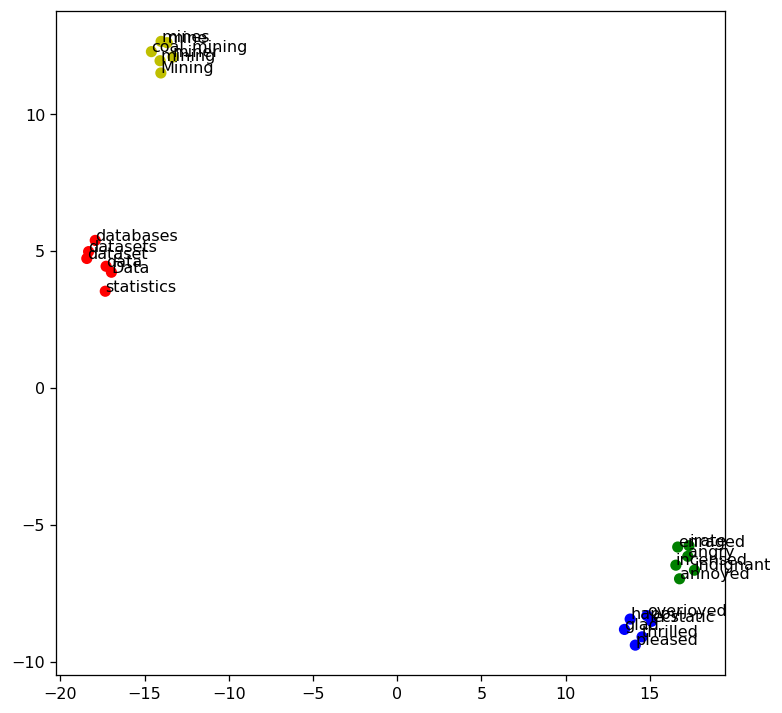

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

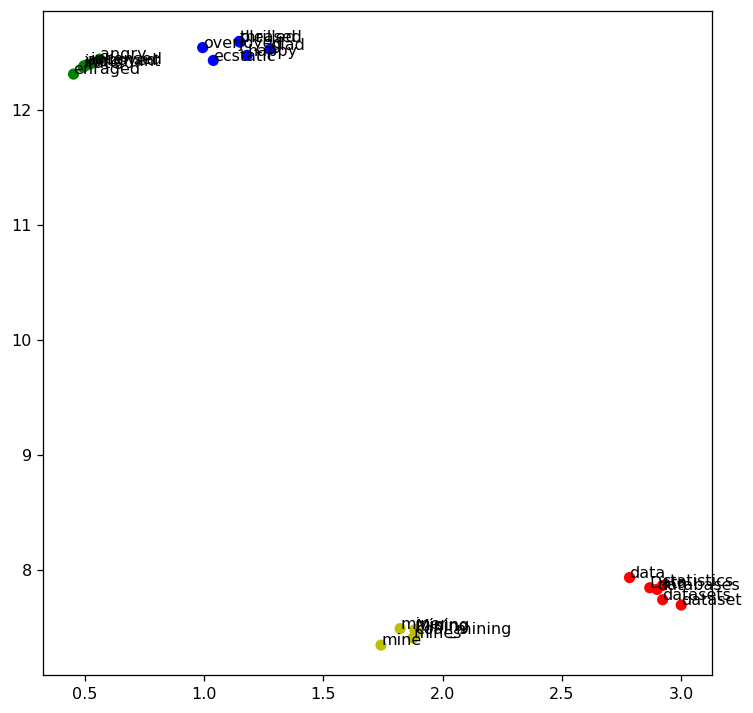

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Get the 15 most similar words for each emotion
emotions = ['angry', 'happy', 'sad', 'fear']
top_n = 15

# Dictionary to store words and their vectors
words_data = {'word': [], 'emotion': [], 'vector': []}

print("\nCOLLECTING RELATED WORDS\n")

for emotion in emotions:
    try:
        similar_words = word2vec_model.wv.most_similar(emotion, topn=top_n)
        print(f"{emotion.upper()}:")
        for i, (word, similarity) in enumerate(similar_words, 1):
            print(f"  {i:2d}. {word:15s} (similarity: {similarity:.4f})")
            words_data['word'].append(word)
            words_data['emotion'].append(emotion)
            words_data['vector'].append(word2vec_model.wv[word])
    except KeyError:
        print(f"  WARNING: '{emotion}' not found in vocabulary!")

# Add the emotion words themselves
for emotion in emotions:
    words_data['word'].append(emotion)
    words_data['emotion'].append(emotion)
    words_data['vector'].append(word2vec_model.wv[emotion])

# Create DataFrame
df = pd.DataFrame(words_data)
X = np.array(df['vector'].tolist())

print(f"Total words collected: {len(df)}")
print(f"Embedding dimension: {X.shape[1]}\n")

# Step 2: Apply t-SNE
print("t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply UMAP
print("UMAP...")
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X)

# Step 4: Create visualizations using Plotly
print("CREATING VISUALIZATIONS \n")

# Define colors for each emotion
color_map = {
    'angry': '#FF4444',  # Red
    'happy': '#44DD44',  # Green
    'sad': '#4444FF',    # Blue
    'fear': '#FFAA44'    # Orange
}

# Create t-SNE plot
fig_tsne = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_tsne.add_trace(go.Scatter(
        x=X_tsne[mask, 0],
        y=X_tsne[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_tsne.update_layout(
    title={
        'text': '<b>t-SNE Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Create UMAP plot
fig_umap = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_umap.add_trace(go.Scatter(
        x=X_umap[mask, 0],
        y=X_umap[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_umap.update_layout(
    title={
        'text': '<b>UMAP Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='UMAP Dimension 1',
    yaxis_title='UMAP Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Display both figures
fig_tsne.show()
fig_umap.show()



COLLECTING RELATED WORDS

ANGRY:
   1. become          (similarity: 0.9738)
   2. used            (similarity: 0.9737)
   3. win             (similarity: 0.9735)
   4. melancholic     (similarity: 0.9699)
   5. 💕               (similarity: 0.9693)
   6. surprised       (similarity: 0.9692)
   7. use             (similarity: 0.9691)
   8. cool            (similarity: 0.9668)
   9. furious         (similarity: 0.9664)
  10. sober           (similarity: 0.9662)
  11. questions       (similarity: 0.9658)
  12. such            (similarity: 0.9647)
  13. city            (similarity: 0.9645)
  14. Things          (similarity: 0.9645)
  15. dont            (similarity: 0.9639)
HAPPY:
   1. free            (similarity: 0.9285)
   2. help            (similarity: 0.9133)
   3. bday            (similarity: 0.9131)
   4. establishment   (similarity: 0.9129)
   5. surprised       (similarity: 0.9123)
   6. Makes           (similarity: 0.9111)
   7. register        (similarity: 0.9072)
   8. O      

Let us play with the values of perplexity for t-SNE and the values of n_neighbors for UMAP:
Above, perplexity = n_neighbors = 5
Under, perplexity = n_neighbors = 3

In [ ]:
# Step 2: Apply t-SNE
print("t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=3, max_iter=1000)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply UMAP
print("UMAP...")
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=3, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X)

# Step 4: Create visualizations using Plotly
print("CREATING VISUALIZATIONS \n")

# Create t-SNE plot
fig_tsne = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_tsne.add_trace(go.Scatter(
        x=X_tsne[mask, 0],
        y=X_tsne[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_tsne.update_layout(
    title={
        'text': '<b>t-SNE Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Create UMAP plot
fig_umap = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_umap.add_trace(go.Scatter(
        x=X_umap[mask, 0],
        y=X_umap[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_umap.update_layout(
    title={
        'text': '<b>UMAP Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='UMAP Dimension 1',
    yaxis_title='UMAP Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Display both figures
fig_tsne.show()
fig_umap.show()


t-SNE...
UMAP...
CREATING VISUALIZATIONS 



Let's try for perplexity = n_neighbors = 2:

In [ ]:
# Step 2: Apply t-SNE
print("t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=2, max_iter=1000)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply UMAP
print("UMAP...")
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=2, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X)

# Step 4: Create visualizations using Plotly
print("CREATING VISUALIZATIONS \n")

# Create t-SNE plot
fig_tsne = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_tsne.add_trace(go.Scatter(
        x=X_tsne[mask, 0],
        y=X_tsne[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_tsne.update_layout(
    title={
        'text': '<b>t-SNE Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Create UMAP plot
fig_umap = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_umap.add_trace(go.Scatter(
        x=X_umap[mask, 0],
        y=X_umap[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_umap.update_layout(
    title={
        'text': '<b>UMAP Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='UMAP Dimension 1',
    yaxis_title='UMAP Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Display both figures
fig_tsne.show()
fig_umap.show()


t-SNE...
UMAP...
CREATING VISUALIZATIONS 



We can observe that the value of the parameters perplexity and n_neighbors has a great importance on the graph and the meaning we can extract from it. Indeed, if we decrease the value of the parameter, the algorighm will be pushed to (and forced to) find the most closely related words for each initial word and push the other words away on the graph, this will have the effect to form clusters, while if we keep this value high, any word is acceptably far away and we don't see this clusterification. 

This can be seen clearly for perplexity = n_neighbors = 15 hereunder. Note that considering the size of the dataset, this value is extremely high, if we had a larger dataset, this value may be more appropriate.

In [ ]:
# Step 2: Apply t-SNE
print("t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=15, max_iter=1000)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply UMAP
print("UMAP...")
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X)

# Step 4: Create visualizations using Plotly
print("CREATING VISUALIZATIONS \n")

# Create t-SNE plot
fig_tsne = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_tsne.add_trace(go.Scatter(
        x=X_tsne[mask, 0],
        y=X_tsne[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_tsne.update_layout(
    title={
        'text': '<b>t-SNE Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Create UMAP plot
fig_umap = go.Figure()

for emotion in emotions:
    mask = df['emotion'] == emotion
    fig_umap.add_trace(go.Scatter(
        x=X_umap[mask, 0],
        y=X_umap[mask, 1],
        mode='markers+text',
        name=emotion.upper(),
        text=df[mask]['word'].values,
        textposition='top center',
        textfont=dict(size=9),
        marker=dict(
            size=10,
            color=color_map[emotion],
            opacity=0.7,
            line=dict(width=1, color='white')
        ),
        hovertemplate='<b>%{text}</b><br>Emotion: ' + emotion + '<extra></extra>'
    ))

fig_umap.update_layout(
    title={
        'text': '<b>UMAP Visualization: Emotion-Related Words</b><br><sub>15 most similar words for each emotion + the emotion word itself</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='UMAP Dimension 1',
    yaxis_title='UMAP Dimension 2',
    width=1000,
    height=800,
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.8)', bordercolor='black', borderwidth=1)
)

# Display both figures
fig_tsne.show()
fig_umap.show()


t-SNE...
UMAP...
CREATING VISUALIZATIONS 



Despite the fact that both visualisation methods create a visualisation of our manifold, there are important differences:

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** focuses on preserving only local neighborhood structure and is better at revealing fine-grained clustering patterns.

**UMAP (Uniform Manifold Approximation and Projection)** focuses on preserving both local and global structure
- Tends to show more continuous manifolds, so it is better at preserving the overall data topology and allows better understanding global word relationships.

For this dataset Both are useful: t-SNE shows emotion-specific clusters, and UMAP shows how emotions relate to each other globally. Despite this, we can see for large values of the parameters that many seemingly unrelated words that still pertain to the same emotion category are grouped together, while for a lower value of the parameter this phenomenon tends to reduce.
This suggests that there are subclusters within each emotion. This makes sense as there are many reasons to feel an emotion. For example for parameter = 2, we see for the Happy emotion a cluster about birthday-related words, which is usually a happy moment in someone's life.
